In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('cleaned_data.xlsx')

In [3]:
data.head()

,Candidate Name,Gender,Age,Qualification,City,District,Skills,Placement Status,Robotic interview
0,name1,NaN,NaN,NaN,NaN,NaN,NaN,No,No
1,name2,Male,30.0,NaN,NaN,NaN,NaN,No,No
2,name3,Male,30.0,Bachelor Of Arts,Wayanad,Wayanad,NaN,No,No
3,name4,Female,44.0,NaN,NaN,NaN,NaN,No,No
4,name5,Female,44.0,Post Graduate Diploma In Computer Application,Thrissur,Thrissur,"cooking,,Tuition Teacher,Writing,Social Servic...",No,No


#EDA

In [4]:
data.isnull().sum()

,0
Candidate Name,0
Gender,4370
Age,5162
Qualification,18831
City,5228
District,5228
Skills,24096
Placement Status,0
Robotic interview,0


In [5]:
data['Placement Status'].value_counts()

,count
Placement Status,
No,101536
Yes,11609


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113145 entries, 0 to 113144
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Candidate Name     113145 non-null  object 
 1   Gender             108775 non-null  object 
 2   Age                107983 non-null  float64
 3   Qualification      94314 non-null   object 
 4   City               107917 non-null  object 
 5   District           107917 non-null  object 
 6   Skills             89049 non-null   object 
 7   Placement Status   113145 non-null  object 
 8   Robotic interview  113145 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.8+ MB


In [7]:
data.shape

(113145, 9)

In [8]:
data.columns

Index(['Candidate Name', 'Gender', 'Age', 'Qualification', 'City', 'District',
       'Skills', 'Placement Status', 'Robotic interview'],
      dtype='object')

In [9]:
data = data.drop('Candidate Name', axis=1)

In [10]:
data.columns

Index(['Gender', 'Age', 'Qualification', 'City', 'District', 'Skills',
       'Placement Status', 'Robotic interview'],
      dtype='object')

In [11]:
data['Age'].unique()

array([ nan,  30.,  44.,  32.,  42.,  31.,  23.,  48.,  24.,  26.,  36.,
        19.,  22.,  35.,  21.,  25.,  28.,  29.,  20.,  15.,  39.,  27.,
        43.,  50.,  18.,  37.,  40.,  34.,  33.,   1.,  45.,  47.,  16.,
        41.,  49.,  38.,  46.,  17.,   0.,  52.,   2.,  69.,  53.,  59.,
        61.,  62.,  54.,   6.,  51.,   8.,  57.,  56.,  55.,  58.,   4.,
        60.,  13.,  96.,   3., 140.,  65., 119.,  72.,  64.,  68.,  71.,
        66., 123.,  63., 124.,  10.])

#Preprocessing

Outlier detection

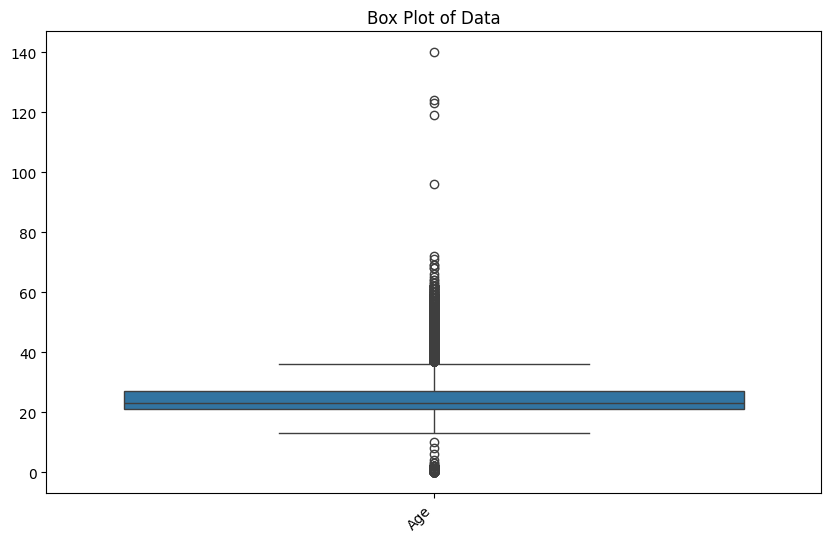

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Data')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
outliers = data[(data['Age'] < 17) | (data['Age'] > 75)]
print(outliers['Age'])

38        15.0
97         1.0
115       15.0
184       16.0
383       16.0
          ... 
112605    15.0
112844    15.0
112871    15.0
112921    15.0
113140     1.0
Name: Age, Length: 689, dtype: float64


In [14]:
num_outliers = len(outliers)
print(f"Number of outliers in 'Age': {num_outliers}")

Number of outliers in 'Age': 689


In [15]:
data = data[(data['Age'] >= 17) & (data['Age'] <= 75)]

In [16]:
data.shape  #5931 ages above 75 and below 17

(107294, 8)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107294 entries, 1 to 113144
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Gender             107250 non-null  object 
 1   Age                107294 non-null  float64
 2   Qualification      93017 non-null   object 
 3   City               107213 non-null  object 
 4   District           107213 non-null  object 
 5   Skills             88393 non-null   object 
 6   Placement Status   107294 non-null  object 
 7   Robotic interview  107294 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.4+ MB


Handling Missing Values

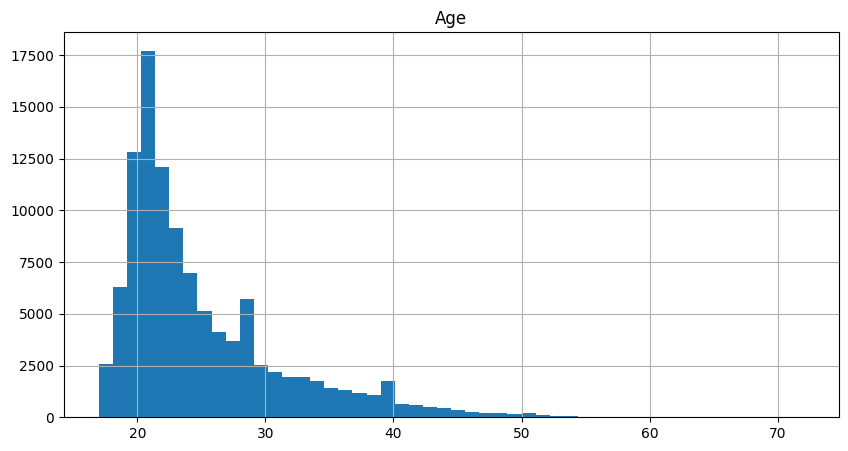

In [18]:
data.hist(bins=50, figsize=(10,5))
plt.show()

fill missing values of Age using median

In [19]:
import numpy as np
for col in data.select_dtypes(include=np.number).columns:
  data[col].fillna(data[col].median(), inplace=True)


<ipython-input-19-9b6e7129e7e4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [20]:
data.isnull().sum()

,0
Gender,44
Age,0
Qualification,14277
City,81
District,81
Skills,18901
Placement Status,0
Robotic interview,0


In [21]:
data['Age'].value_counts()

,count
Age,
21.0,17720
20.0,12841
22.0,12105
23.0,9144
24.0,6994
19.0,6276
25.0,5112
26.0,4115
27.0,3680


In [22]:
data['Age'].unique()

array([30., 44., 32., 42., 31., 23., 48., 24., 26., 36., 19., 22., 35.,
       21., 25., 28., 29., 20., 39., 27., 43., 50., 18., 37., 40., 34.,
       33., 45., 47., 41., 49., 38., 46., 17., 52., 69., 53., 59., 61.,
       62., 54., 51., 57., 56., 55., 58., 60., 65., 72., 64., 68., 71.,
       66., 63.])

fill missing values using mode imputation to categorical columns

In [23]:
categorical_columns = ['Gender', 'Qualification', 'City', 'District', 'Skills']


for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)



<ipython-input-23-031ef7d0e636>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [24]:
data.isnull().sum()

,0
Gender,0
Age,0
Qualification,0
City,0
District,0
Skills,0
Placement Status,0
Robotic interview,0


Encoding

label encode the binary columns like Gender  , Placment Status , Robotic Interview

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Gender', 'Placement Status', 'Robotic interview']:
  data[column] = le.fit_transform(data[column])


In [26]:
data['Gender'].unique()

array([1, 0, 2])

In [27]:
data.head()

,Gender,Age,Qualification,City,District,Skills,Placement Status,Robotic interview
1,1,30.0,Bachelor Of Commerce,Pathanamthitta,Pathanamthitta,Communication,0,0
2,1,30.0,Bachelor Of Arts,Wayanad,Wayanad,Communication,0,0
3,0,44.0,Bachelor Of Commerce,Pathanamthitta,Pathanamthitta,Communication,0,0
4,0,44.0,Post Graduate Diploma In Computer Application,Thrissur,Thrissur,"cooking,,Tuition Teacher,Writing,Social Servic...",0,0
8,1,32.0,Bachelor Of Business Administration,Thrissur,Thrissur,Communication,0,0


Encoding of Qualification , Skills

In [28]:
data['Qualification'].unique()

array(['Bachelor Of Commerce', 'Bachelor Of Arts',
       'Post Graduate Diploma In Computer Application',
       'Bachelor Of Business Administration',
       'Bachelor Of Science and and Master Of Science',
       'Computer Operator and Programming Assistant  (VISUALLY IMPAIRED) (IT & ITES Sector)',
       'CBSE12th', 'Diploma Engineering', 'VHSE', 'HSC (Plus2)',
       'Technician Power Electronics System (Electronics & Hardware Sector)',
       'Twelfth Equivalency',
       'Diploma In Computer Application and Business Management',
       'Master Of Science', 'Diploma in Electronics',
       'Master Of Arts (Economics)',
       'Bachelor Of Commerce (Professional)',
       'Bachelor Of Commerce and Bachelor Of Legislative Law (Hons.)',
       'SSLC', 'Bachelor Of Computer Applications', 'Bachelor Of Science',
       'Bachelor Of Vocational Education', 'AHSS (12th)',
       'Afsal-Ul-Ulama (Final)', 'AfzalUlUlama (Preliminary)',
       'Marine Engine Fitter (Capital Goods & Manufact

In [29]:
data['Skills'].unique()

array(['Communication',
       'cooking,,Tuition Teacher,Writing,Social Service,Leadership Quality,Co Ordination',
       'Lab Work', ...,
       'Storekeeper,Office Assistant,Office Boy,Section Incharge',
       'Hardworking,Computer Skills,Typing Skill',
       'Adaptable To Different Si,Ability To Work In A Team,Basic Knowledge In Ms Exc,Goal Oriented And Determi'],
      dtype=object)

In [30]:
data['Qualification'].nunique()

614

In [31]:
data['Skills'].nunique()

53712

Smooth Target Encoding

In [32]:
import pandas as pd
import numpy as np

# Ensure 'Skills' and 'Qualification' are of the correct type (string or categorical)
data['Skills'] = data['Skills'].astype(str)
data['Qualification'] = data['Qualification'].astype(str)

# Define the regularization function for target encoding with smoothing
def target_encode_smoothing(data, column, target, min_samples=1, smoothing=1):
    # Compute the global mean of the target
    global_mean = data[target].mean()

    # Compute the number of values and the mean of each group
    agg = data.groupby(column)[target].agg(['mean', 'count'])

    # Apply smoothing
    agg['smooth'] = (agg['count'] * agg['mean'] + smoothing * global_mean) / (agg['count'] + smoothing)

    # Map the smoothed values back to the original column
    return data[column].map(agg['smooth'])

# Apply Target Encoding with Regularization (Smoothing) to 'Skills' and 'Qualification' columns
smoothing_value = 10  # You can experiment with this value
min_samples = 1       # Minimum number of samples to apply smoothing

# Apply the target encoding with smoothing
data['Skills_encoded'] = target_encode_smoothing(data, 'Skills', 'Placement Status', min_samples, smoothing_value)
data['Qualification_encoded'] = target_encode_smoothing(data, 'Qualification', 'Placement Status', min_samples, smoothing_value)

# Drop the original columns after encoding (optional)
data.drop(['Skills', 'Qualification'], axis=1, inplace=True)

# Preview the dataframe
print(data.head())


   Gender   Age            City        District  Placement Status  \
1       1  30.0  Pathanamthitta  Pathanamthitta                 0   
2       1  30.0         Wayanad         Wayanad                 0   
3       0  44.0  Pathanamthitta  Pathanamthitta                 0   
4       0  44.0        Thrissur        Thrissur                 0   
8       1  32.0        Thrissur        Thrissur                 0   

   Robotic interview  Skills_encoded  Qualification_encoded  
1                  0        0.130571               0.086127  
2                  0        0.130571               0.034834  
3                  0        0.130571               0.086127  
4                  0        0.096057               0.035275  
8                  0        0.130571               0.054621  


In [33]:
data.head()

,Gender,Age,City,District,Placement Status,Robotic interview,Skills_encoded,Qualification_encoded
1,1,30.0,Pathanamthitta,Pathanamthitta,0,0,0.130571,0.086127
2,1,30.0,Wayanad,Wayanad,0,0,0.130571,0.034834
3,0,44.0,Pathanamthitta,Pathanamthitta,0,0,0.130571,0.086127
4,0,44.0,Thrissur,Thrissur,0,0,0.096057,0.035275
8,1,32.0,Thrissur,Thrissur,0,0,0.130571,0.054621


label encoding district

In [34]:
data['City'].unique()

array(['Pathanamthitta', 'Wayanad', 'Thrissur', 'Malappuram', 'Idukki',
       'Kottayam', 'Kozhikode', 'Ernakulam', 'Thiruvananthapuram',
       'Kannur', 'Kollam', 'Alappuzha', 'Kasaragod', 'Palakkad'],
      dtype=object)

In [35]:
data['District'].unique()

array(['Pathanamthitta', 'Wayanad', 'Thrissur', 'Malappuram', 'Idukki',
       'Kottayam', 'Kozhikode', 'Ernakulam', 'Thiruvananthapuram',
       'Kannur', 'Kollam', 'Alappuzha', 'Kasaragod', 'Palakkad'],
      dtype=object)

In [36]:

data = data.drop('City', axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107294 entries, 1 to 113144
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 107294 non-null  int64  
 1   Age                    107294 non-null  float64
 2   District               107294 non-null  object 
 3   Placement Status       107294 non-null  int64  
 4   Robotic interview      107294 non-null  int64  
 5   Skills_encoded         107294 non-null  float64
 6   Qualification_encoded  107294 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 6.5+ MB


In [38]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data['District_Label_Encoded'] = label_encoder.fit_transform(data['District'])


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107294 entries, 1 to 113144
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  107294 non-null  int64  
 1   Age                     107294 non-null  float64
 2   District                107294 non-null  object 
 3   Placement Status        107294 non-null  int64  
 4   Robotic interview       107294 non-null  int64  
 5   Skills_encoded          107294 non-null  float64
 6   Qualification_encoded   107294 non-null  float64
 7   District_Label_Encoded  107294 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 7.4+ MB


In [40]:
data.head()

,Gender,Age,District,Placement Status,Robotic interview,Skills_encoded,Qualification_encoded,District_Label_Encoded
1,1,30.0,Pathanamthitta,0,0,0.130571,0.086127,10
2,1,30.0,Wayanad,0,0,0.130571,0.034834,13
3,0,44.0,Pathanamthitta,0,0,0.130571,0.086127,10
4,0,44.0,Thrissur,0,0,0.096057,0.035275,12
8,1,32.0,Thrissur,0,0,0.130571,0.054621,12


In [46]:
data.drop('District', axis=1, inplace=True)

Scaling

In [47]:
data.head()

,Gender,Age,Placement Status,Robotic interview,Skills_encoded,Qualification_encoded,District_Label_Encoded
1,0.5,0.236364,0.0,0.0,0.189207,0.116302,0.769231
2,0.5,0.236364,0.0,0.0,0.189207,0.043478,1.000000
3,0.0,0.490909,0.0,0.0,0.189207,0.116302,0.769231
4,0.0,0.490909,0.0,0.0,0.134885,0.044105,0.923077
8,0.5,0.272727,0.0,0.0,0.189207,0.071570,0.923077


In [43]:


from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to all numerical columns
for column in data.select_dtypes(include=np.number).columns:
  data[column] = scaler.fit_transform(data[[column]])

# Print the scaled data
print(data.head())

   Gender       Age        District  Placement Status  Robotic interview  \
1     0.5  0.236364  Pathanamthitta               0.0                0.0   
2     0.5  0.236364         Wayanad               0.0                0.0   
3     0.0  0.490909  Pathanamthitta               0.0                0.0   
4     0.0  0.490909        Thrissur               0.0                0.0   
8     0.5  0.272727        Thrissur               0.0                0.0   

   Skills_encoded  Qualification_encoded  District_Label_Encoded  
1        0.189207               0.116302                0.769231  
2        0.189207               0.043478                1.000000  
3        0.189207               0.116302                0.769231  
4        0.134885               0.044105                0.923077  
8        0.189207               0.071570                0.923077  


In [49]:
data.head()

,Gender,Age,Placement Status,Robotic interview,Skills_encoded,Qualification_encoded,District_Label_Encoded
1,0.5,0.236364,0.0,0.0,0.189207,0.116302,0.769231
2,0.5,0.236364,0.0,0.0,0.189207,0.043478,1.000000
3,0.0,0.490909,0.0,0.0,0.189207,0.116302,0.769231
4,0.0,0.490909,0.0,0.0,0.134885,0.044105,0.923077
8,0.5,0.272727,0.0,0.0,0.189207,0.071570,0.923077


Balancing Target Colmun


In [48]:
data['Placement Status'].value_counts()

,count
Placement Status,
0.0,95957
1.0,11337


In [50]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Features (X) and target (y)
X = data.drop('Placement Status', axis=1)  # Drop target column
y = data['Placement Status']               # Target column

# Initialize SMOTETomek with ratio, for example, keeping a 70:30 balance
smote_tomek = SMOTETomek(sampling_strategy=0.7)

# Apply SMOTETomek to the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Display the new class distribution after balancing
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0.0: 95957, 1.0: 11337})
Resampled class distribution: Counter({0.0: 95155, 1.0: 66367})


In [53]:
data['Placement Status'].value_counts()

,count
Placement Status,
0.0,95957
1.0,11337


In [54]:
# Convert the resampled data back into a DataFrame
import pandas as pd

# Combine the resampled features (X_resampled) and the target (y_resampled) back into a single DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)  # X_resampled has no 'Placement Status'
data_resampled['Placement Status'] = y_resampled  # Add the target column back

# Check the new class distribution
print(data_resampled['Placement Status'].value_counts())


Placement Status
0.0    95155
1.0    66367
Name: count, dtype: int64


In [55]:
data_resampled.head()

,Gender,Age,Robotic interview,Skills_encoded,Qualification_encoded,District_Label_Encoded,Placement Status
0,0.5,0.236364,0.0,0.189207,0.116302,0.769231,0.0
1,0.5,0.236364,0.0,0.189207,0.043478,1.000000,0.0
2,0.0,0.490909,0.0,0.189207,0.116302,0.769231,0.0
3,0.0,0.490909,0.0,0.134885,0.044105,0.923077,0.0
4,0.5,0.272727,0.0,0.189207,0.071570,0.923077,0.0


In [56]:
data_resampled.shape

(161522, 7)

In [57]:
data_resampled['Placement Status'].value_counts()

,count
Placement Status,
0.0,95155
1.0,66367


#feature selection

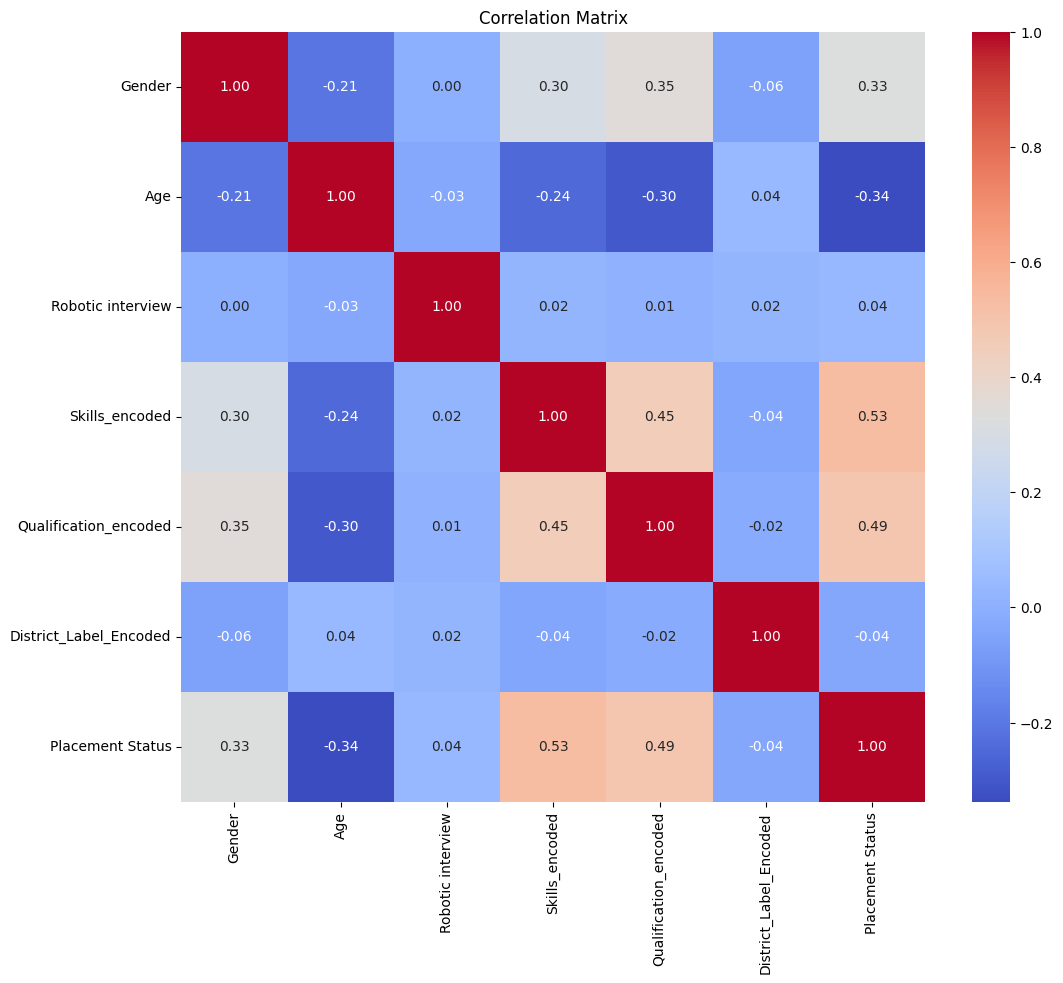

In [60]:
# prompt: plot coreation graph

# Calculate the correlation matrix
correlation_matrix = data_resampled.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#model building

In [62]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your dataset is already preprocessed
# Let's assume 'data' is your dataframe, and 'Placement Status' is the target column.

# Defining the feature columns and the target column
X = data_resampled.drop(['Placement Status'], axis=1)  # Features (drop target column)
y = data_resampled['Placement Status']  # Target column

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Outputting the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 94.72%
Confusion Matrix:
[[17952   969]
 [  737 12647]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     18921
         1.0       0.93      0.94      0.94     13384

    accuracy                           0.95     32305
   macro avg       0.94      0.95      0.95     32305
weighted avg       0.95      0.95      0.95     32305



In [63]:
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

# data set to csv and model pickling

In [64]:

# Convert the DataFrame to a CSV file
data_resampled.to_csv('data_resampled.csv', index=False)  # Set index=False to avoid saving the index column

In [65]:
# prompt: also need to pickle the model now developed

import pickle

# Assuming 'rf_model' is your trained Random Forest model

# Specify the file path where you want to save the model
model_filename = 'rf_model.pkl'

# Save the model to a file using pickle
with open(model_filename, 'wb') as file:
  pickle.dump(rf_model, file)

print(f"Model saved to {model_filename}")

Model saved to rf_model.pkl
